In [1]:
# 필요한 라이브러리 import
import numpy as np
import pandas as pd
import json
import requests
import branca
import folium
import seaborn as sns
from folium.plugins import MarkerCluster
import matplotlib.pyplot as plt
from matplotlib import rcParams, style, font_manager, rc
import matplotlib as mpl
import plotly.express as px

In [2]:
import chart_studio
chart_studio.tools.set_credentials_file(username='username', api_key='api_key')
import chart_studio.plotly as py
import plotly.express as px

In [3]:
# 한글폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [4]:
# 마이너스 깨질 때
mpl.rcParams['axes.unicode_minus']=False

In [5]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt 

mpl.rc('font',family='Malgun Gothic')

In [6]:
import statsmodels.tsa.api as tsa

In [7]:
df1=pd.read_csv('./월별 운수수익(2011.01-2022.10).csv',encoding='cp949')
df1

,날짜,운수수익
0,2011-01-01,15397387803
1,2011-02-01,14464504026
2,2011-03-01,18460210060
3,2011-04-01,17512716113
4,2011-05-01,18066619791
...,...,...
137,2022-06-01,18603705360
138,2022-07-01,17843437374
139,2022-08-01,18925750976
140,2022-09-01,17839382250


<AxesSubplot:xlabel='날짜', ylabel='운수수익'>

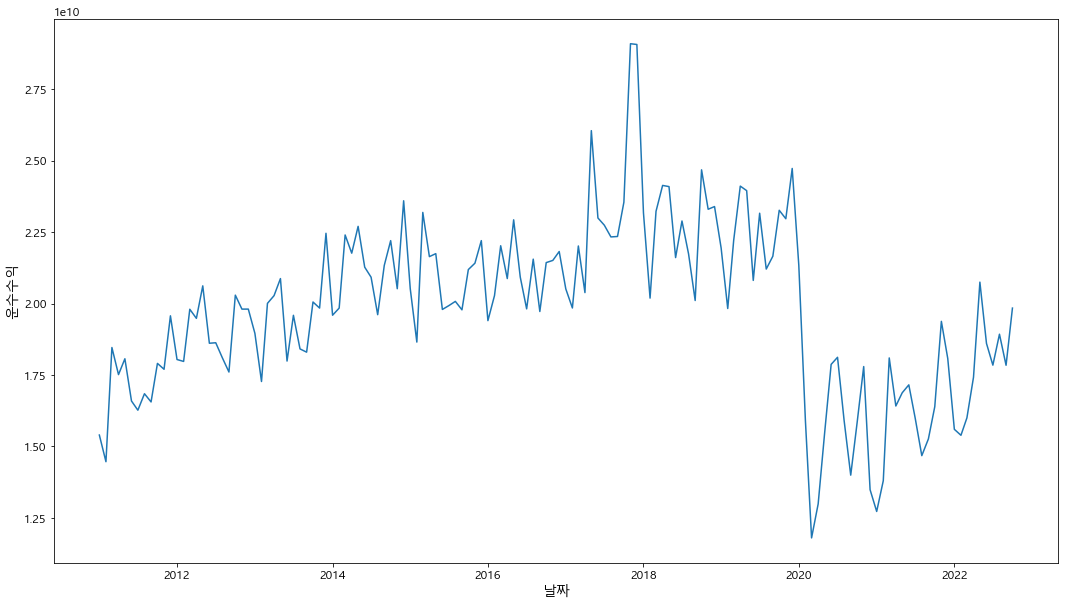

In [33]:
plt.figure(figsize= (18,10))
sns.lineplot(data=df1, x='날짜' ,y='운수수익', ci=None , estimator=sum)

In [9]:
# to_datetime으로 day 피처를 시계열 피처로 변환합니다. 
df1['날짜'] = pd.to_datetime(df1['날짜'])

# day 데이터프레임의 index로 설정합니다.
df1.index = df1['날짜']
df1.set_index('날짜', inplace=True)
df1.head()

,운수수익
날짜,
2011-01-01,15397387803
2011-02-01,14464504026
2011-03-01,18460210060
2011-04-01,17512716113
2011-05-01,18066619791


In [10]:
df1.describe()

,운수수익
count,1.420000e+02
mean,1.980958e+10
std,3.009243e+09
min,1.179852e+10
25%,1.792188e+10
50%,1.984218e+10
75%,2.175723e+10
max,2.909027e+10


<Figure size 1440x1440 with 0 Axes>

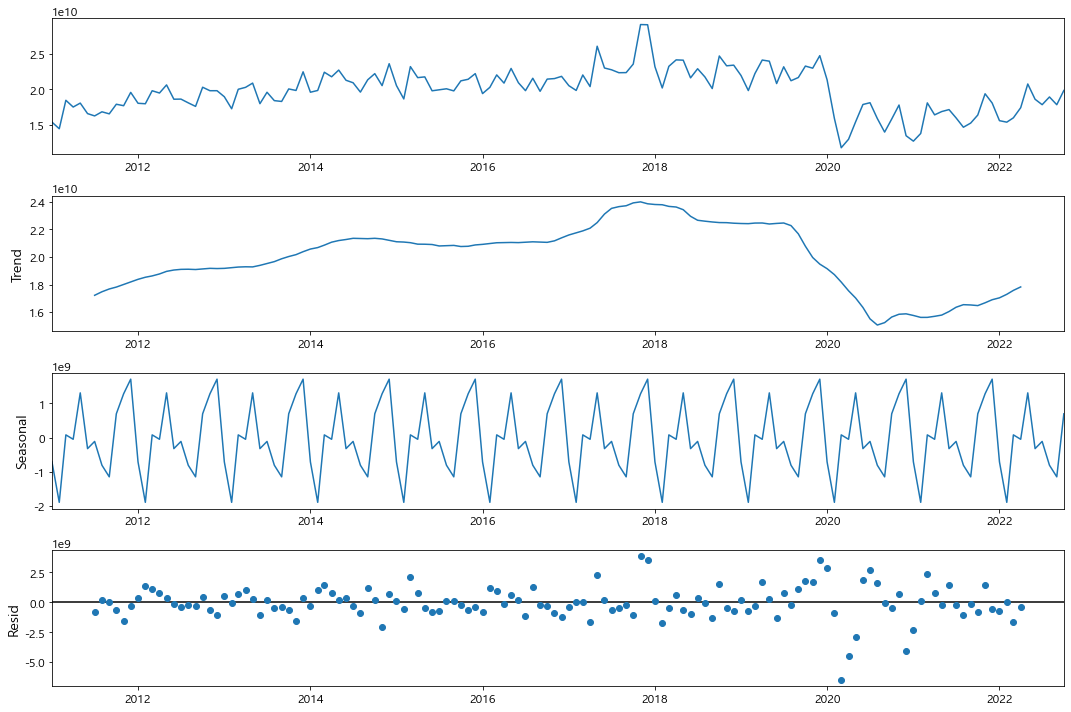

In [35]:
plt.figure(figsize=(20,20))
model_series = tsa.seasonal_decompose(df1, model='additive')
fig = model_series.plot()
plt.show()

In [12]:
y = df1['운수수익'].resample('1m').mean()

In [13]:
y1 = y.fillna( y.mean() )

In [14]:
y1

날짜
2011-01-31    1.539739e+10
2011-02-28    1.446450e+10
2011-03-31    1.846021e+10
2011-04-30    1.751272e+10
2011-05-31    1.806662e+10
                  ...     
2022-06-30    1.860371e+10
2022-07-31    1.784344e+10
2022-08-31    1.892575e+10
2022-09-30    1.783938e+10
2022-10-31    1.983981e+10
Freq: M, Name: 운수수익, Length: 142, dtype: float64

In [15]:
import itertools # 반복수를 만드는 라이브러리 

In [16]:
rcParams['figure.figsize'] = 15,10

#차트 기본 크기 설정
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['text.color'] = 'k'

In [38]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

In [39]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [40]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [19]:
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [20]:
param_list = []
param_seasonal_list = []
results_AIC_list = []

- tsa.statespace.SARIMAX()
    - endog : 관측된 시계열 데이터 (endogeneous 데이터를 말합니다)
    - exog : 관측된 시계열에 영향을 미치는 외부 변수 데이터 (exogeneous  데이터를 말합니다)
    - order : ARIMA의 (p,d,q)
    - seasonal_order : SARIMA의 seasonal component인 (P,D,Q)S
    - enforce_stationary : AR 항이 stationary를 만족하게끔 강제하는 것으로 디폴트는 True
    - enforce_invertibility : MA 항이 stationary를 만족하게끔 강제하는 것으로 디폴트는 Fals

In [43]:
# AIC값을 찾기 위한 반복문
for param in pdq:
     for param_seasonal in seasonal_pdq:
        try:
            mod = tsa.statespace.SARIMAX(y1,order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            param_list.append(param)
            param_seasonal_list.append(param_seasonal)
            results_AIC_list.append(results.aic)
        except:
             continue

In [41]:
ARIMA_list = pd.DataFrame({'Parameter':param_list,'Seasonal':param_seasonal_list,'AIC':results_AIC_list})
#ARIMA_list.to_excel('arima_model_list.xlsx')

In [42]:
ARIMA_list.sort_values(by='AIC')
# AIC 값이 제일 낮은게 가장 정확한 모델? 값?이다

,Parameter,Seasonal,AIC
63,"(1, 1, 1)","(1, 1, 1, 12)",5254.697399
59,"(1, 1, 1)","(0, 1, 1, 12)",5256.781644
31,"(0, 1, 1)","(1, 1, 1, 12)",5257.349642
27,"(0, 1, 1)","(0, 1, 1, 12)",5260.043541
47,"(1, 0, 1)","(1, 1, 1, 12)",5298.957101
...,...,...,...
1,"(0, 0, 0)","(0, 0, 1, 12)",6408.799553
12,"(0, 0, 1)","(1, 0, 0, 12)",6415.004371
32,"(1, 0, 0)","(0, 0, 0, 12)",6446.696061
8,"(0, 0, 1)","(0, 0, 0, 12)",6946.054494


In [44]:
# 훈련
mod = tsa.statespace.SARIMAX(y1,order=(1, 1, 1),seasonal_order=(1, 1, 1, 12),
                              enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               운수수익   No. Observations:                  142
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -2622.349
Date:                            Thu, 10 Nov 2022   AIC                           5254.697
Time:                                    16:03:59   BIC                           5268.422
Sample:                                01-31-2011   HQIC                          5260.268
                                     - 10-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3397      0.270      1.256      0.209      -0.190       0.870
ma.L1         -0.6601      0.205   

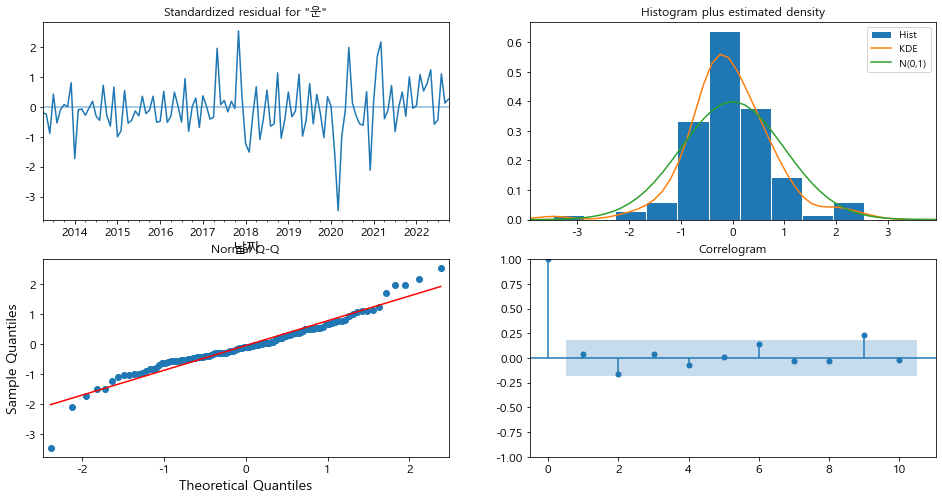

In [25]:
# 훈련 결과 시각화
results.plot_diagnostics(figsize=(16, 8))
plt.show()

1사분면 - 정규분포를 띄고있음\
2사분면 - 평균과 분산이 고르다???\
3사분면 - 추세선에 근접하다\
4사분면 - 기각역 안에 존재해서 유의미한 결과가 있음을 나타낸다???

In [26]:
results.get_prediction()

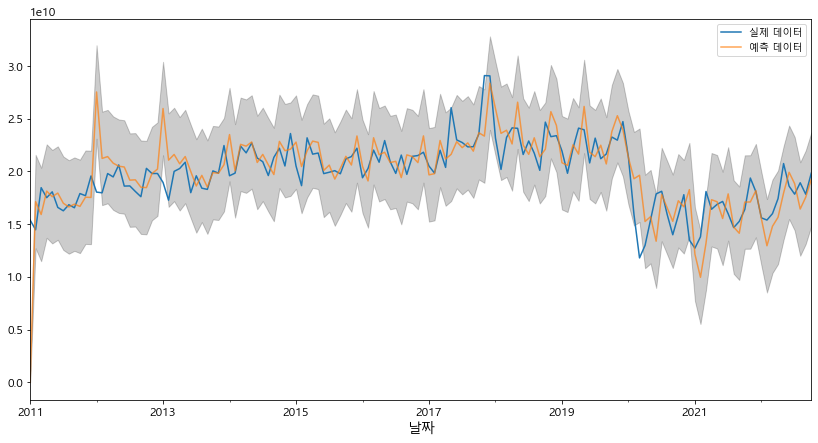

In [45]:
pred = results.get_prediction(start=pd.to_datetime('2011-01-31'), dynamic=False)
pred_ci = pred.conf_int()

ax = y1.plot(label='실제 데이터')
pred.predicted_mean.plot(ax=ax, label='예측 데이터', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.2)

plt.legend()
plt.show()

In [28]:
pred = results.get_prediction(start=pd.to_datetime('2011-01-31'), dynamic=False)
pd.DataFrame(pred.predicted_mean).reset_index()

,날짜,predicted_mean
0,2011-01-31,0.000000e+00
1,2011-02-28,1.714077e+10
2,2011-03-31,1.591419e+10
3,2011-04-30,1.813686e+10
4,2011-05-31,1.760287e+10
...,...,...
137,2022-06-30,1.992021e+10
138,2022-07-31,1.883816e+10
139,2022-08-31,1.643434e+10
140,2022-09-30,1.755450e+10


In [46]:
y_forecasted = pred.predicted_mean
y_truth = y['2011-01-31':]
mse = ((y_forecasted - y_truth) ** 2).mean()
# MSE : 평균 제곱 오차
print('MSE {}'.format(round(mse, 2)))

MSE 5.95476479188908e+18


In [30]:
pred_uc = results.get_forecast(steps=50)

In [31]:
pred_uc.predicted_mean

2022-11-30    2.128440e+10
2022-12-31    1.925700e+10
2023-01-31    1.731833e+10
2023-02-28    1.658950e+10
2023-03-31    1.819041e+10
2023-04-30    1.821896e+10
2023-05-31    1.988075e+10
2023-06-30    1.944792e+10
2023-07-31    1.893703e+10
2023-08-31    1.818528e+10
2023-09-30    1.777313e+10
2023-10-31    1.940141e+10
2023-11-30    2.143952e+10
2023-12-31    1.967730e+10
2024-01-31    1.758448e+10
2024-02-29    1.702152e+10
2024-03-31    1.831635e+10
2024-04-30    1.877777e+10
2024-05-31    2.095643e+10
2024-06-30    1.999268e+10
2024-07-31    1.940444e+10
2024-08-31    1.922169e+10
2024-09-30    1.860038e+10
2024-10-31    2.034411e+10
2024-11-30    2.219809e+10
2024-12-31    2.035360e+10
2025-01-31    1.830860e+10
2025-02-28    1.769419e+10
2025-03-31    1.908397e+10
2025-04-30    1.941111e+10
2025-05-31    2.142941e+10
2025-06-30    2.063038e+10
2025-07-31    2.006613e+10
2025-08-31    1.970686e+10
2025-09-30    1.915043e+10
2025-10-31    2.085835e+10
2025-11-30    2.276945e+10
2

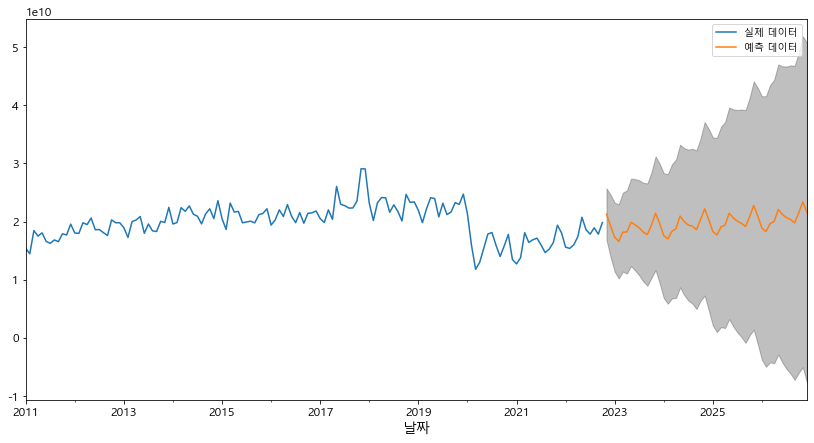

In [47]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int() #추정된 계수의 신뢰구간 계산
ax = y1.plot(label='실제 데이터', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='예측 데이터')
ax.fill_between(pred_ci.index,
                 pred_ci.iloc[:, 0],
                 pred_ci.iloc[:, 1], color='k', alpha=.25)

plt.legend()
plt.show()